# HR Diagram of M5 Cluster
by Michael Chenevey

## Photometry
We use the astropy package to handle to fits images and as a helper with statistics

In [1]:
# Import astropy packages
import astropy.stats as astats
from astropy.io import fits
import numpy as np
from numpy import nan
from scipy.optimize import curve_fit
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 10,8
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.size'] = 12

from astropy.stats import sigma_clipped_stats
from photutils import find_peaks
from photutils import DAOStarFinder
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import CircularAperture

from photutils import aperture_photometry, CircularAperture
from astropy.modeling import models, fitting

fits_dict = {
    '2sV'   : 'afbts_0138.M67.fits',
    '5sV'   : 'afbts_0137.M67.fits',
    '30sV'  : 'afbts_0139.M67.fits',
    '120sV' : 'afbts_0140.M67.fits',
    '300sV' : 'afbts_0141.M67.fits',
    '2sB'   : 'afbts_0143.M67.fits',
    '5sB'   : 'afbts_0142.M67.fits',
    '30sB'  : 'afbts_0144.M67.fits',
    '120sB' : 'afbts_0145.M67.fits',
    '300sB' : 'afbts_0146.M67.fits',
    '5sR'   : 'afbts_0147.M67.fits',
    '30sR'  : 'afbts_0148.M67.fits',
    '120sR' : 'afbts_0149.M67.fits',
    '300sR' : 'afbts_0150.M67.fits'
}

['SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'EXTEND', 'ORIGIN', 'DATE', 'IRAF-TLM', 'OBJECT', 'RA', 'DEC', 'AIR', 'RRA', 'RDEC', 'REPOCH', 'TRA', 'TDEC', 'TEPOCH', 'POFFS', 'ST', 'HA', 'TELFOCUS', 'FILTER', 'GFWHM', 'SEGNO', 'REQAIRM', 'GHIST', 'COBJECT', 'TEMPS', 'COMMENT', 'COMMENT', 'COMMENT', 'DATE-OBS', 'UTOPEN', 'UTEND', 'MJD', 'SITENAME', 'SITELONG', 'SITELAT', 'SITEELEV', 'DETECTOR', 'CTEMP', 'EXPTIME', 'DARKTIME', 'IMAGETYP', 'CCDMEAN', 'DETSIZE', 'CCDSUM', 'SECPIX1', 'SECPIX2', 'NAMPS', 'ORIGSEC', 'DTV1', 'DTV2', 'CD1_1', 'CD2_2', 'GAIN', 'RDNOISE', 'CRPIX1', 'CRPIX2', 'ATV1', 'ATV2', 'LTM1_1', 'LTM2_2', 'ATM1_1', 'ATM2_2', 'DTM1_1', 'DTM2_2', 'CTYPE1', 'CTYPE2', 'CRVAL1', 'CRVAL2', 'WCSDIM', 'WAT0_001', 'WAT1_001', 'WAT2_001', 'TRIM', 'OVERSCAN', 'ZEROCOR', 'FLATCOR', 'CCDPROC', 'CDELT1', 'CDELT2', 'NCOMBINE', 'BPM', 'LTV1', 'LTV2', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
flwo2


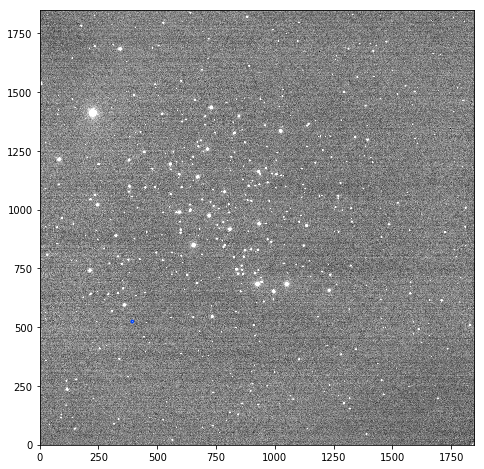

In [2]:
# Open an image
filename = fits_dict['2sV']
hdulist  = fits.open(filename)
print(list(hdulist[0].header.keys()))
print(hdulist[0].header['SITENAME'])
img1 = hdulist[0].data[100:-100,100:-100]

# Open an image
filename = fits_dict['2sB']
hdulist  = fits.open(filename)
print(hdulist[0])
img2 = hdulist[0].data[100:-100,100:-100]

# Calculate the mean, median, and standard deviation of the data in the image.
mean, median, std = astats.sigma_clipped_stats(img1, sigma=3.0, maxiters=5)

apertures = CircularAperture(([394], [524]), r=5.)

# Plot the image
plt.figure(figsize=(10,8)) 
plt.imshow(img1, vmin=median-6.0*std, vmax=median+6.0*std, cmap='gray', origin='lower')
apertures.plot(color='#0547f9', lw=1.5)
plt.show()



In [3]:
std = astats.mad_std(img1)
tbl = DAOStarFinder(threshold = 3. * std, fwhm = 2.5).find_stars(img1)
tbl['flux'].info.format = '%.8g'  # for consistent table output
print(tbl)

 id      xcentroid          ycentroid      ...    flux            mag         
---- ------------------ ------------------ ... --------- ---------------------
   1 1837.4642998440788 3.1956617001943934 ... 7.6939186   -2.2153689651246427
   2  672.0013569002839  3.681059478989223 ... 1.1513836   -0.1530501435920823
   3  869.5349247005803  4.110217016454835 ... 1.0448769 -0.047662782074361684
   4 1005.4049434004673 4.0126134030931215 ... 1.0702945   -0.0737581868851066
   5  235.1622372711022 4.7649493387221336 ... 1.7776321   -0.6246047287962674
   6  510.1070385180125  6.260308496767798 ... 1.0808194   -0.0843828539160918
   7 1829.7826491348899  6.106953547549507 ...  1.074832  -0.07835147153560978
   8  750.1822673006315  6.613348211994715 ... 1.0396082  -0.04217428660381579
   9  979.7706936772854  6.890817684671657 ... 1.0795847   -0.0831418276477079
  10 1155.8134182471183   6.36990696367262 ... 1.0716935  -0.07517651186823916
 ...                ...                ... ...      

x_peak y_peak peak_value
------ ------ ----------
  1837      3  124.92345
   562     21  564.84094
   411     36  78.850204
  1386     46    297.064
   762     51  132.41649
   148     69  997.07477
  1135     70  234.17262
   118     72  77.169617
   688     73  161.87338
   578     75  84.677528
   ...    ...        ...
  1298   1780  346.53409
   175   1782  922.69135
   725   1790  76.558838
   523   1795  881.12396
  1100   1797  281.50735
  1802   1801  137.80341
  1755   1818  141.75438
   880   1820  1292.6848
   231   1826  118.14045
  1327   1831   237.4783
   637   1838  343.13559
Length = 511 rows


(0, 1849)

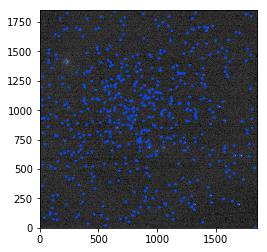

In [4]:

mean, median, std = sigma_clipped_stats(img1, sigma=3.0)
threshold = median + (10. * std)
tbl = find_peaks(img1, threshold, box_size=11)
tbl['peak_value'].info.format = '%.8g'  # for consistent table output

print(tbl)

positions = (tbl['x_peak'], tbl['y_peak'])
stars = list(zip(positions[0], positions[1]))

def get_rect(x, y):
    return (max(0, x - 10), max(0, y - 10), x + 10, y + 10)

rects = [get_rect(positions[0][i], positions[1][i]) for i in range(len(positions[0]))]
apertures = CircularAperture(positions, r=5.)
norm = simple_norm(img1, 'sqrt', percent=99.9)
plt.imshow(img1, cmap='Greys_r', origin='lower', norm=norm)
apertures.plot(color='#0547f9', lw=1.5)
plt.xlim(0, img1.shape[1]-1)
plt.ylim(0, img1.shape[0]-1)

We can do a test on one of our stars now:

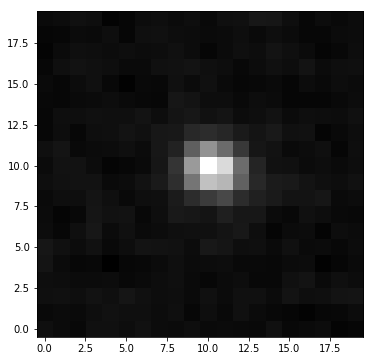

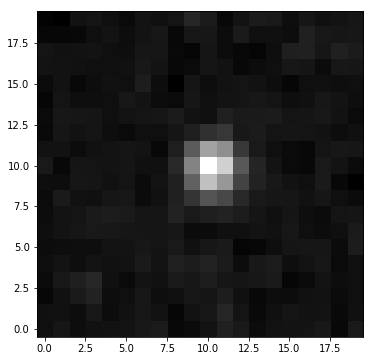

In [5]:
rect = rects[31]

# Crop the Array
cropped_data1 = img1[rect[1]:rect[3],rect[0]:rect[2]]
cropped_data2 = img2[rect[1]:rect[3],rect[0]:rect[2]]

# Plot the Data
plt.figure(figsize=(6,6)) 
plt.imshow(cropped_data1, cmap='gray', origin='lower')
plt.show()

# Plot the Data
plt.figure(figsize=(6,6)) 
plt.imshow(cropped_data2, cmap='gray', origin='lower')
plt.show()

### From Workshop 4

"Stars on an image have what is called a Point Spread Function, which is, simply put, a function of how the photons spread over the image. A gaussian is a reasonable function that describes a star's PSF. Now, just like we fit a gaussian function before to the spectroscopic line, we're going to fit a 2D gaussian to the star.

In this case you don't have to define a 2D gaussian, one is already provided for you in the astropy package. We're going to import this model as well as a function that can fit these models. Since the image also has a background, we are going to need a compound model that combined a 2D Gaussian plus a constant background.

Based on the image above, we can fill in the missing parameters for initial guess for the model."

In [6]:
# Construct the Model
starmodel = models.Gaussian2D(amplitude=10000.0, x_mean=10.0, y_mean=10.0, x_stddev=1.0, y_stddev=1.0)
const     = models.Const2D(amplitude=20000.0)
fullmodel = starmodel + const

# We need a grid over which to fit the model
y, x = np.mgrid[:20, :20]

# Fit the data
fitter = fitting.LevMarLSQFitter()

# Print Results
bestfit = fitter(fullmodel, x, y, cropped_data1)

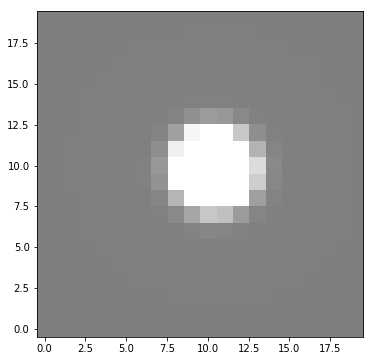

In [7]:
# Evaluate the best model
resulting_model = bestfit(x,y)

# Get the median
_, median_model, _ = astats.sigma_clipped_stats(resulting_model, sigma=3.0, maxiters=5)

plt.figure(figsize=(6,6))
plt.imshow(bestfit(x,y), vmin=median_model-6.0*std, vmax=median_model+6.0*std, cmap='gray', interpolation='none', origin='lower')
plt.show()

(1064, 185, 1084, 205)
1074.3125337475196 194.78254329581569 6.872102160032308


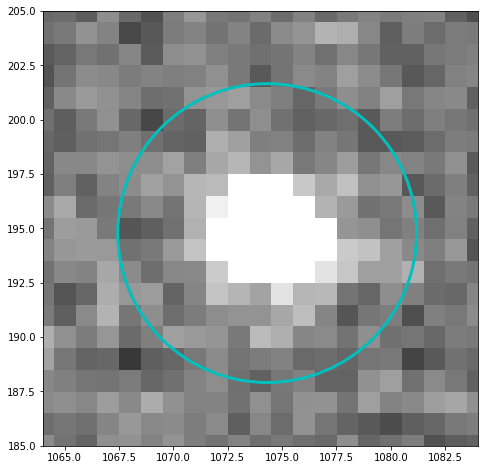

 id      xcenter            ycenter          aperture_sum  
           pix                pix                          
--- ------------------ ------------------ -----------------
  1 1074.3125337475196 194.78254329581569 8856.826317716896


In [8]:
sigma = (bestfit.x_stddev_0.value + bestfit.y_stddev_0.value) / 2
FWHM = (2 * (2 * np.log(2)) ** (1/2)) * sigma
scale = 0.774
seeing = FWHM * scale

print(rect)
xcenter       = rect[0] + bestfit.x_mean_0.value
ycenter       = rect[1] + bestfit.y_mean_0.value
aperture_size = 2.5 * FWHM
print(xcenter, ycenter, aperture_size)

# Define an Aperture
position = (xcenter, ycenter)
aperture = CircularAperture(position, r=aperture_size)

# Plot the aperture
plt.figure(figsize=(8,8))
plt.imshow(img1, vmin=median_model-6.0*std, vmax=median_model+6.0*std, cmap='gray', interpolation='none')
aperture.plot(color='c', lw=3)

#zoom in on region where star is 
plt.xlim(rect[0],rect[2])
plt.ylim(rect[1],rect[3])
plt.show()

result = aperture_photometry(img1, aperture)
print(result)

### Again, from Workshop 4: ###

Now that we know how many counts there are in the aperture, we can figure out the magnitude of the star.

We can use the documentation of IRAF's `phot` function to figure out how to calculate this. `phot` calculates the magnitude as follows:

$$ flux = sum - area \times msky $$
$$ mag = zmag - 2.5 \times \log(flux) + 2.5 \times \log(itime) $$
$$ error = sqrt\left(\frac{flux}{epadu} + area \times stdev^2 + area^2 \times \frac{stdev^2}{nsky}\right) $$
$$ merr = 1.0857 \times \left(\frac{error}{flux}\right) $$

In these equations, $sum$ is the number of counts inside the aperture, $msky$ is the number of counts per pixel due to the sky, $area$ is the number of pixels in the aperture, $zmag$ is the zero-point (30 is the default), $itime$ is the exposure time, $epadu$ is the gain in electrons per adu, $stdev$ is the standard deviation of the background in counts, and $nsky$ is the number of pixels used for the sky region. 1.0857 is the correction term between an error in flux (electons) and one in magnitudes.

In [9]:
msky = bestfit.amplitude_1.value
zmag = 30
exp_time = hdulist[0].header['EXPTIME']

flux = result['aperture_sum'] - (np.pi * (aperture_size/2) ** 2) * msky
mag = zmag - 2.5 * np.log10(flux) + 2.5 * np.log10(exp_time)

print(mag)

   aperture_sum   
------------------
21.138934327122477


# Cluster Comprehension
Next, we will abstract our work from Workshop 4 into some usable functions so we can iterate over all of our stars

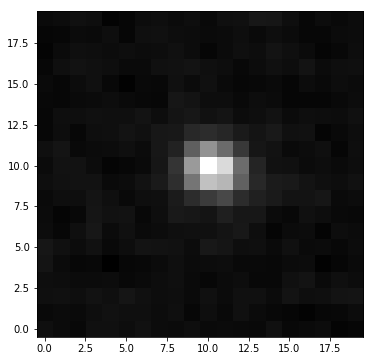

A = 155.2543374024653
x = 10.312533747519568
y = 9.782543295815694
x_sigma = 1.1562412918923768
y_sigma = 1.178409179436353
C = 49.90557485058432
23.85284829238672


In [10]:
'''
get_mag(img, rect):

Extracts a magnitude, but may return None if the star is determined to be oversaturated
Additionally, we may detect if our aperture incorrectly contains more than 1 star/source.
'''

def get_mag(img, pos, zmag=30, graph=False):
    rect = get_rect(pos[0], pos[1])
    cropped_data = img[rect[1]:rect[3],rect[0]:rect[2]]
    
    # Construct the Model
    starmodel = models.Gaussian2D(amplitude=10000.0, x_mean=10.0, y_mean=10.0, x_stddev=1.0, y_stddev=1.0)
    const     = models.Const2D(amplitude=20000.0)
    fullmodel = starmodel + const

    # We need a grid over which to fit the model
    y, x = np.mgrid[:20, :20]

    try:
        # Fit the data
        fitter          = fitting.LevMarLSQFitter()
        bestfit         = fitter(fullmodel, x, y, cropped_data)
        resulting_model = bestfit(x,y)

        # Get the median
        _, median_model, _ = astats.sigma_clipped_stats(resulting_model, sigma=3.0, maxiters=5)
        sigma  = (bestfit.x_stddev_0.value + bestfit.y_stddev_0.value) / 2
        FWHM   = (2 * (2 * np.log10(2)) ** (1/2)) * sigma
        scale  = 0.774
        seeing = FWHM * scale

        xcenter       = rect[0] + bestfit.x_mean_0.value
        ycenter       = rect[1] + bestfit.y_mean_0.value
        aperture_size = 2.5 * FWHM

        # Define an Aperture
        position = (xcenter, ycenter)
        aperture = CircularAperture(position, r=aperture_size)
        
        if graph:
            # Plot the aperture
            plt.figure(figsize=(6,6)) 
            plt.imshow(cropped_data, cmap='gray', origin='lower')
            plt.show()
            print("A = "       + str(bestfit.amplitude_0.value))
            print("x = "       + str(bestfit.x_mean_0.value   ))
            print("y = "       + str(bestfit.y_mean_0.value   ))
            print("x_sigma = " + str(bestfit.x_stddev_0.value ))
            print("y_sigma = " + str(bestfit.y_stddev_0.value ))
            print("C = "       + str(bestfit.amplitude_1.value))

        if bestfit.x_stddev_0.value <= 0.1 or bestfit.y_stddev_0.value <= 0.1:
            raise Exception('Anomalous Gaussian!')
        elif bestfit.x_stddev_0.value >= 5 or bestfit.y_stddev_0.value >= 5:
            raise Exception('Anomalous Gaussian!')
            
        result   = aperture_photometry(img, aperture)
        msky     = bestfit.amplitude_1.value
        zmag     = zmag
        exp_time = 5

        flux = result['aperture_sum'] - (np.pi * (aperture_size) ** 2) * msky
        mag  = zmag - 2.5 * np.log10(flux) + 2.5 * np.log10(exp_time)

    except Exception as e:
        return None

    if mag[0] > zmag or mag[0] < 5:
        return None
    return mag[0]

i = 31
print(get_mag(img1, stars[i], graph=True))

We recalculate the zmag for each filter using our reference stars. We have two reference stars at `8:50:59.755, +11:39:21.057` and `8:51:42.015, +11:43:35.786` which correspond to image coords `x:1412, y:256` and `x:494, y:624`, respectively. However, we crop our images by 100 pixels on each side, so these coords would become `x:1312, y:156` and `x:394, y:524`

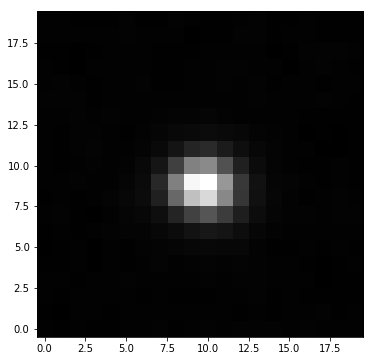

A = 859.1147888589637
x = 9.6582560444294
y = 8.6910580386233
x_sigma = 1.2609974670360884
y_sigma = 1.2295451793599566
C = 51.33322444725738


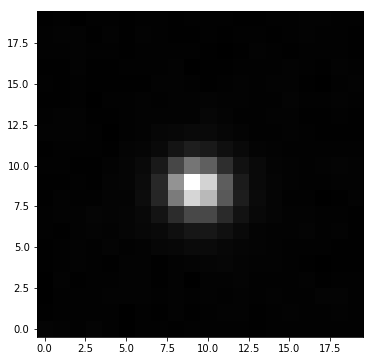

A = 724.9761007280482
x = 9.296935858043557
y = 8.652397589904014
x_sigma = 1.0409763086050763
y_sigma = 1.2791256475458463
C = 50.444718416273936


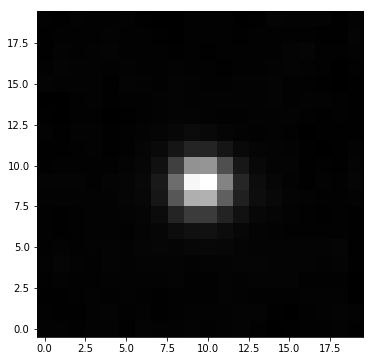

A = 491.62437757926597
x = 9.566250875303862
y = 8.872041471706279
x_sigma = 1.2009812114266076
y_sigma = 1.0868407678554128
C = 40.13222858371145


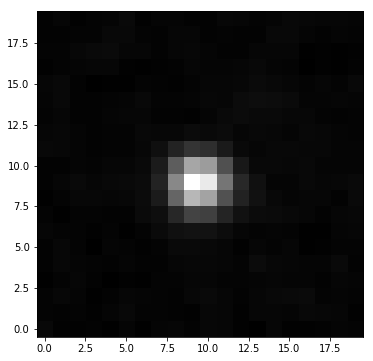

A = 225.79836127932222
x = 9.411738587980897
y = 8.93177016823026
x_sigma = 1.169100554062194
y_sigma = 1.2128965657383213
C = 40.11813398743646
21.744470135366686 21.376133413567196


In [11]:
img_v = fits.open(fits_dict['2sV'])[0].data[100:-100,100:-100]
img_b = fits.open(fits_dict['2sB'])[0].data[100:-100,100:-100]

vmag1 = get_mag(img_v, (394, 524), graph=True)
vtrumag1 = 12.770
vmag2 = get_mag(img_v, (1315, 156), graph=True)
vtrumag2 = 12.830

bmag1 = get_mag(img_b, (394, 524), graph=True)
btrumag1 = 13.240
bmag2 = get_mag(img_b, (1315, 156), graph=True)
btrumag2 = 13.660

zmag_v = 31 - (vmag1 + vmag2 - vtrumag1 - vtrumag2) / 2
zmag_b = 31 - (bmag1 + bmag2 - btrumag1 - btrumag2) / 2
print(zmag_v, zmag_b)

Next we need to construct a way to handle 4-quadrant images in different filters

In [12]:
# We have a lot of stars, so we can change warnings to exceptions and be selective
import warnings
warnings.simplefilter('error', UserWarning)
np.seterr(all='raise')

def get_peaks(img):
    scidata = img.data
    # Calculate the mean, median, and standard deviation of the data in the image.
    mean, median, std = astats.sigma_clipped_stats(scidata, sigma=3.0, maxiters=5)
    threshold = median + (5. * std)
    tbl = find_peaks(scidata, threshold, box_size=11)
    tbl['peak_value'].info.format = '%.8g'  # for consistent table output
    positions = (tbl['x_peak'], tbl['y_peak'])
    return list(zip(*positions))

def get_mags(img, pos, zmag=30):
    mags = [get_mag(img, pos[i], zmag) for i in range(len(rects))]
    return mags
    
def get_mags_from_filters(input_list, fit=None):
    imlist = [fits.open(x)[0].data[100:-100,100:-100] for x in input_list]
    
    if fit:
        img_v = imlist[0]
        img_b = imlist[1]
        
        diffs = ([], [])
        for i in range(len(fit[0])):
            
            vmag = get_mag(img_v, fit[0][i])
            bmag = get_mag(img_b, fit[0][i])
            
            if vmag and bmag:
                diffs[0].append(fit[1][i] - vmag)
                diffs[1].append(fit[2][i] - bmag)
        
        delta_v = 0
        delta_b = 0
        
        N = len(diffs[0])
        
        for i in range(N):
            delta_v += diffs[0][i] / N
            delta_b += diffs[1][i] / N
        
        print(delta_v, delta_b)
        
        zmags = [30 + delta_v, 30 + delta_b]
    else:
        zmags = [30, 30]
    
    # Contains a list of magnitudes for each filter across all frames
    mags = []
    
    # Get star locations for first image
    pos = get_peaks(imlist[0])
    
    for i in range(len(imlist)):
        mags_im = get_mags(imlist[i], pos, zmag=zmags[i])
        mags.append(mags_im)
        
    return list(zip(pos, *mags))

Now, we can construct an HR graph using the difference between the V and B magnitudes as color and the V magnitude as the luminosity

In [13]:
# Pull magnitudes from a list of exposures
fit = [[(394, 524), (1315, 156)], [12.770, 12.830], [13.240, 13.660]]
mags_lst = get_mags_from_filters([(fits_dict['2sV']), (fits_dict['2sB'])], fit=fit)

-9.255529864633314 -9.623866586432804


In [14]:
def app_to_abs(mag, d=827.8):
    return mag - 5.0 * np.log10(d/10)

def absmag_to_luminosity(mag):
    return 10.0 ** ((4.83 - mag) / 2.5)

def appmag_to_luminosity(mag, d=827.8):
    return absmag_to_luminosity(app_to_abs(mag, d=d))

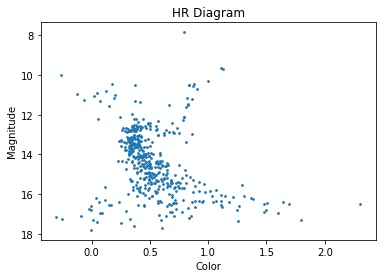

In [15]:
# Remove any stars that are missing values
cleaned_mags = mags_lst
cleaned_mags = [(x[1], x[2]) for x in cleaned_mags if None not in x]

def ballesteros(B_V):
    return 4600 * (1 / (0.92 * B_V + 1.7) + 1 / (0.92 * B_V + 1.62)) 

# Get the values for the axes in our scatterplot
luminosities = [x[0] for x in cleaned_mags]
colors = [x[1] - x[0] for x in cleaned_mags]

plt.title("HR Diagram")
plt.xlabel("Color")
plt.ylabel("Magnitude")
plt.scatter(colors, luminosities, s=3)
plt.gca().invert_yaxis()
plt.show()

In [34]:
def show_hr_diagram(im1, im2, fit=None):
    # Pull magnitudes from a list of exposures
    mags_lst = get_mags_from_filters([im1, im2], fit=fit)

    
    # Remove any stars that are missing values, shift if fit given
    cleaned_mags = mags_lst
    cleaned_mags = [(x[0], app_to_abs(x[1]), app_to_abs(x[2])) for x in cleaned_mags if None not in x]
    
    # Get the values for the axes in our scatterplot
    luminosities = [x[1] for x in cleaned_mags]
    colors = [x[2] - x[1] for x in cleaned_mags]

    plt.figure(figsize=(8, 6))
    plt.title("HR Diagram")
    plt.xlabel("Color")
    plt.ylabel("Magnitude")
    plt.scatter(colors, luminosities, s=3)
    plt.gca().invert_yaxis()
    plt.show()
    
    return [list(x) for x in zip(*cleaned_mags)]

starting
-9.255529864633314 -9.623866586432804


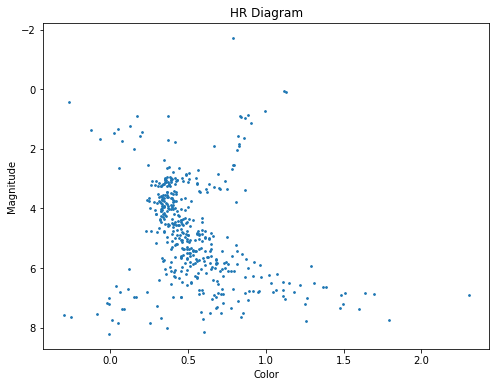

done


In [35]:
print("starting")
fit = [[(394, 524), (1315, 156)], [12.770, 12.830], [13.240, 13.660]]
fit = show_hr_diagram(fits_dict['2sV'], fits_dict['2sB'], fit=fit)
'''
show_hr_diagram(fits_dict['5sV'], fits_dict['5sB'], fit=fit)
show_hr_diagram(fits_dict['30sV'], fits_dict['30sB'], fit=fit)
show_hr_diagram(fits_dict['120sV'], fits_dict['120sB'], fit=fit)
show_hr_diagram(fits_dict['300sV'], fits_dict['300sB'], fit=fit)
'''
print("done")

# Cluster Age

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from isochrones.dartmouth import Dartmouth_Isochrone
%matplotlib inline

In [18]:
# Pull magnitudes from a list of exposures
fit = [[(394, 524), (1315, 156)], [12.770, 12.830], [13.240, 13.660]]
mags_lst = get_mags_from_filters([(fits_dict['2sV']), (fits_dict['2sB'])], fit=fit)

# Remove any stars that are missing values, shift if fit given
cleaned_mags = mags_lst
cleaned_mags = [(x[0], app_to_abs(x[1]), app_to_abs(x[2])) for x in cleaned_mags if None not in x]

# Get the values for the axes in our scatterplot
luminosities = [x[1] for x in cleaned_mags]
colors = [x[2] - x[1] for x in cleaned_mags]


-9.255529864633314 -9.623866586432804


## Model with guess (log t = 9)

In [44]:
iso = Dartmouth_Isochrone(bands=['B','V'])
model = iso.isochrone(9)
model_b = model.B_mag
model_v = model.V_mag
# calculate B-V for this model
model_bv = model_b - model_v

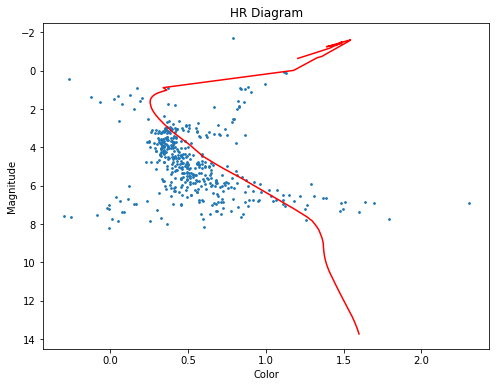

In [46]:
plt.figure(figsize=(8, 6))
plt.title("HR Diagram")
plt.xlabel("Color")
plt.ylabel("Magnitude")
plt.scatter(colors, luminosities, s=3)
plt.gca().invert_yaxis()
plt.plot(model_bv,model_v, color='red')
plt.show()

## Model with guess (log t = 9.505)

In [59]:
iso = Dartmouth_Isochrone(bands=['B','V'])
model = iso.isochrone(9.50)
model_b = model.B_mag
model_v = model.V_mag
# calculate B-V for this model
model_bv = model_b - model_v

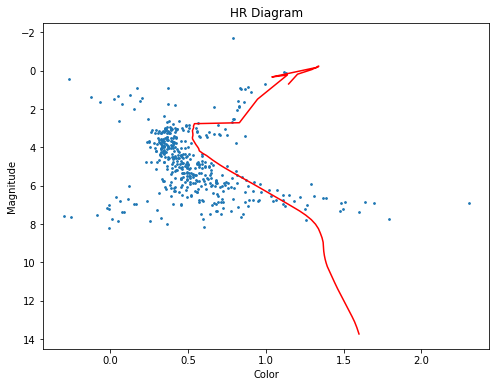

In [60]:
plt.figure(figsize=(8, 6))
plt.title("HR Diagram")
plt.xlabel("Color")
plt.ylabel("Magnitude")
plt.scatter(colors, luminosities, s=3)
plt.gca().invert_yaxis()
plt.plot(model_bv,model_v, color='red')
plt.show()

## Fitted Model

In [70]:
iso = Dartmouth_Isochrone(bands=['B','V'])
model = iso.isochrone(9.505)
model_b = model.B_mag
model_v = model.V_mag
# calculate B-V for this model
model_bv = model_b - model_v - 0.2

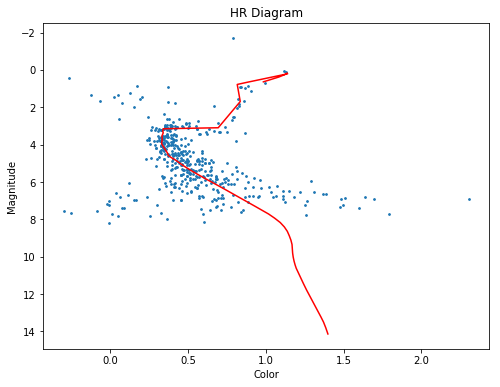

In [71]:
plt.figure(figsize=(8, 6))
plt.title("HR Diagram")
plt.xlabel("Color")
plt.ylabel("Magnitude")
plt.scatter(colors, luminosities, s=3)
plt.gca().invert_yaxis()
plt.plot(model_bv,model_v + 0.4, color='red')
plt.show()

In [72]:
print(10 ** 9.505)

3198895109.691404


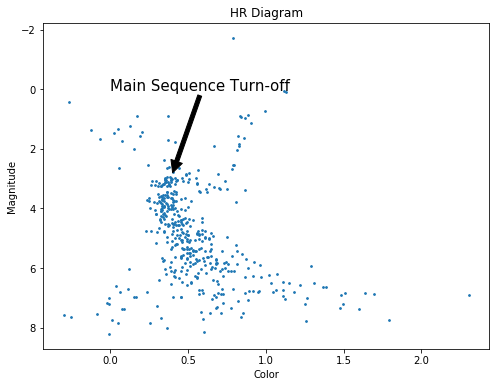

In [56]:
plt.figure(figsize=(8, 6))
plt.title("HR Diagram")
plt.xlabel("Color")
plt.ylabel("Magnitude")
plt.scatter(colors, luminosities, s=3)
plt.gca().invert_yaxis()
plt.annotate("Main Sequence Turn-off", xy=(0.4, 2.8), xytext=(0, 0.045),arrowprops=dict(facecolor='black'),fontsize = 15)
plt.show()